> # Chapter 9. Randomness
---
1. Conditional Statements 


2. Iteration 


3. Simulation 


4. The Monty Hall Problem


5. Finding Probabilities

> Simulation에서 원에 들어갈 확률 구하기 -> pi = 4 * K/N

In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

+ 관찰 결과가 유의미한지를 판단하기 위해 randomness 이해가 필요


+ 본 class에서는 numpy 내 _random_ sub-module을 활용


+ 먼저 numpy.random.choice() method 사용법을 익히자.

In [2]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'treatment'

+ 위 코드의 실행결과는 실행할때마다 달라진다.


+ random 구현이란 non-deterministic function이 있다는 의미이다.


+ choice를 여러번 한 array 결과를 만들수도 있다.

In [3]:
np.random.choice(two_groups, 10)

array(['treatment', 'treatment', 'control', 'treatment', 'treatment',
       'treatment', 'treatment', 'control', 'treatment', 'control'],
      dtype='<U9')

+ 다음과 같은 array에 대한 비교 연산이 유용하다.   

 - 앞서 배운 array의 모든 element에 대해 한꺼번에 연산하는 것이다.

In [4]:
tosses = make_array('Tails', 'Heads', 'Tails', 'Heads', 'Heads')
tosses == 'Heads'

array([False,  True, False,  True,  True])

In [5]:
np.count_nonzero(tosses == 'Heads')

3

> ### 조건문 (Conditional Statements)
---
+ 조건문을 다룰 필요가 있다.


+ Python의 _if~else_ 문법을 사용한다.

In [6]:
def sign(x):
    
    if x > 0:
        return 'Positive'

In [7]:
sign(3)

'Positive'

In [8]:
sign(-3)

+ 결과값이 없다.


+ 다음과 같이 바꾸어 보자.

In [9]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'

In [10]:
sign(-3)

'Negative'

+ sign(0)의 결과값이 없다.


+ 다시 다음과 같이 바꾸어 보자.

In [11]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    elif x == 0:
        return 'Neither positive nor negative'


In [12]:
sign(0)


'Neither positive nor negative'

+ 다음과 같은 구현이 더 좋다.

In [13]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    else:
        return 'Neither positive nor negative'

+ 조건문을 구현하는 일반적인 문법은 다음과 같다.

    if <if expression>: 
    
        <if body> 
    
    elif <elif expression 0>:

        <elif body 0>
    
    elif <elif expression 1>:

        <elif body 1>
    
    ...

    else:
        <else body>

+ 들여쓰기(indentation)를 잘 맞추어야 됨을 주의하자.

> Example: The Other One
---
+ 두 element 중 하나가 입력되면 다른 하나를 return하는 함수를 작성해 보자.

In [14]:
def other_one(x, a_b):
    
    """Compare x with the two elements of a_b;
    if it is equal to one of them, return the other one;
    if it is not equal to either of them, return an error message.
    """
    if x == a_b.item(0):
        return a_b.item(1)
    
    elif x == a_b.item(1):
        return a_b.item(0)
    
    else:
        return 'The input is not valid.'


In [15]:
colors = make_array('red', 'blue')
other_one('red', colors)

'blue'

In [16]:
other_one('blue', colors)

'red'

In [17]:
other_one('potato', colors)

'The input is not valid.'

> ### 반복문 (Iteration)
---
+ 모든 instance 혹은 모든 attribute에 대해서 계산할 필요가 있을 때 사용된다.


+ _for_ 구문을 활용한다.


In [18]:
for i in np.arange(3):
    print(i)

0
1
2


+ 동전던지기를 5회 수행해보자.

In [19]:
coin = make_array('Heads', 'Tails')

for i in np.arange(5):
    print(np.random.choice(coin))


Heads
Heads
Tails
Heads
Heads


> Augmenting Arrays
---
+ array에 element를 추가해 보자.

In [20]:
pets = make_array('Cat', 'Dog')
pets = np.append(pets, 'Another Pet')
pets

array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

> ### Example: Counting the Number of Heads
---
+ 동전던지기 5회를 하여 결과를 array에 저장해 보자.

In [21]:
coin = make_array('Heads', 'Tails')
outcomes = make_array()

for i in np.arange(5):
    outcome_of_toss = np.random.choice(coin)
    outcomes = np.append(outcomes, outcome_of_toss) # append를 통해 결과를 모음
    #outcome_of_toss의 값을 outcomes에 저장해줌.
outcomes


array(['Heads', 'Tails', 'Tails', 'Heads', 'Heads'], dtype='<U32')

+ 앞서 choice 함수의 옵션을 활용해 같은 일을 할 수 있다.

In [22]:
another_outcomes=np.random.choice(coin, 5) # 5번 던져라 라는 의미
# choice는 이후 많이 사용 X
another_outcomes

array(['Tails', 'Heads', 'Tails', 'Heads', 'Tails'], dtype='<U5')

+ 몇 번 Heads가 나왔는지를 헤아려 보자.

In [23]:
outcomes == 'Heads'

array([ True, False, False,  True,  True])

In [24]:
np.count_nonzero(outcomes == 'Heads')

3

+ 시행횟수를 크게 증가시켜보자.

In [25]:
outcomes = make_array()

for i in np.arange(10000):
    outcome_of_toss = np.random.choice(coin)
    outcomes = np.append(outcomes, outcome_of_toss)

np.count_nonzero(outcomes == 'Heads')

4986

> ### Simulations
---
+ 실제 상황을 컴퓨터로 모사하는 것을 _simulation_ 이라고 한다.


+ 다음과 같은 단계를 밟는다.

    - __Step 1: What to Simulate__
        * Simulation 대상(quantity)을 정한다.
        * 예) 동전던지기의 결과  
        
    - __Step 2: Simulating One Value__
        * 앞 단계에서 정한 대상의 수치화를 정한다. 
        * 예) 동전을 던져 앞면이 나온 횟수, 비율, 등등
    - __Step 3: Number of Repetitions__
        * 반복 시행 횟수를 정한다. 
        * 예) 동전을 1000회 던지기 
    - __Step 4: Coding the Simulation__    
        * 코드를 작성한다. 
            - 수치값을 저장하기 위한 empty array를 생성한다. (collection array라고 부른다).
            - np.arange(n)를 이용하여 반복 순열을 정의해 둔다.
            - 다음을 위 순열만큼 반복하는 for loop를 만든다: 
                - Step 2에서 정의한 수치값을 simulation한다. 
                - Collention array에 구한 수치값을 추가한다. 



> #### Example: Number of Heads in 100 Tosses
---
+ Step 1:
 - Simulation 대상 = 100회 동전던지기 중 앞면이 나온 횟수

+ Step 2: 
 - 다음과 같이 *num_heads* 변수에 해당값을 구할 수 있다.

In [26]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

39

+ Step 3:
 - 시행 횟수를 10000번이라 하고 _for_ 구문을 통해 구현할 것이다.

+ Step 4:
 - 전체 코드를 다음과 같이 작성해 볼 수 있다.

In [27]:
# An empty array to collect the simulated values
heads = make_array()

# Repetitions sequence
num_repetitions = 10000

# for loop
for i in np.arange(num_repetitions):
    
    # simulate one value
    outcomes = np.random.choice(coin, 100)
    num_heads = np.count_nonzero(outcomes == 'Heads')
    
    # augment the collection array with the simulated value
    heads = np.append(heads, num_heads)  

# That's it! The simulation is done.
heads

array([52., 53., 49., ..., 45., 53., 49.])

In [35]:
heads.mean()
heads.__len__()

10000

+ simulation 결과를 Table 형태로 저장하자.

In [36]:
simulation_results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)
simulation_results

Repetition,Number of Heads
1,52
2,53
3,49
4,50
5,59
6,48
7,44
8,47
9,50
10,49


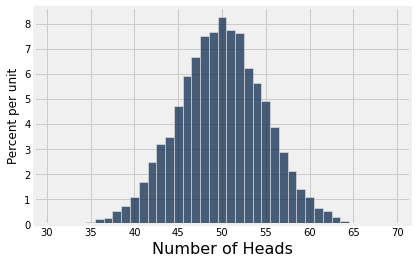

In [ ]:
simulation_results.hist('Number of Heads',bins = np.arange(30.5, 69.6, 1))
# bins = 두께 지정
# 면적을 통해 확률 구할 수 있음. 8% 확률로 50이 나옴.
# 아래 그래프는 앞면이 나온 횟수가 기준
# 그래프를 앞면이 나온 비율로 그려보기

+ 예상했듯이 50을 기준으로 대칭적 분포이다.

>#### Example: Moves in Monopoly
---
+ 두 주사위를 굴려 합의 분포를 분석해 보자.


+ Step 2를 다음과 같이 구현할 수 있겠다.

In [37]:
die = np.arange(1, 7)
sum(np.random.choice(die, 2))


4

+ 전체 코드를 다음과 같이 작성할 수 있다.

In [38]:
moves = make_array()
num_repetitions = 10000

for i in np.arange(num_repetitions):
    one_move = sum(np.random.choice(die, 2))
    moves = np.append(moves, one_move)

moves

array([ 9.,  9.,  8., ...,  5., 10.,  8.])

+ 결과를 Table로 저장하여 histogram을 살펴보자.

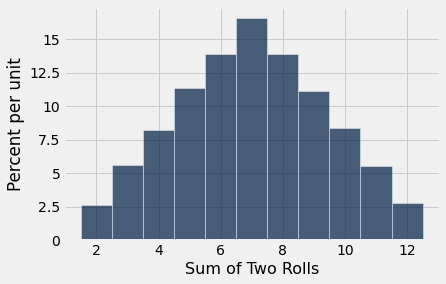

In [39]:
results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls', moves
)

results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))


> ### The Monty Hall Problem
---
+ 확률 패러독스 예


+ 문제:
 - 참가자는 3개의 닫혀진 문 앞에 선다.
 - 한 개의 문뒤에는 고급승용차가, 나머지 2개 문 뒤에는 염소가 있으며 참가자는 어느 문에 무엇이 있는지 모른다. 물론 사회자는 알고 있다.
 - 참가자는 3개의 문 중 하나를 선택한다. 하지만 문을 열지는 않는다.
 - 이 때 사회자(Monty Hall)는 나머지 2개의 문 중 염소가 있는 문을 하나 열어 보여 준다.
 - 이제 참가자는 여전히 닫힌 2개의 문 중 하나를 최종 선택하게 된다. 
 
 
 
+ 결국 마지막 단계에서 처음 선택한 문을 유지할 지 아니면 다른 문으로 바꿀 지 결정한다. (물론 고급승용차를 받기 위해서)

+ Solution
 - 참가자는 처음 선택한 문 대신 남은 문으로 선택을 바꾸는 것이 더 좋다.
 - simulation을 통해 확인해 보자.

+ Step 1 
 - 3개의 문이 정의되어야 한다.
   - 참가자가 처음 선택한 문
   - Monty가 연 문
   - 나머지 문

+ Step 2 
 - 1회 simulation은 위 3개의 문을 차례로 담은 배열을 생성한다.
 - 즉, [original choice, what Monty throws out, what remains] 형태가 된다.
 - 다음 코드를 정의하자.

In [ ]:
doors = make_array('Car', 'Goat 1', 'Goat 2')
goats = make_array('Goat 1', 'Goat 2')

def is_goat(door_name):
    if door_name == "Goat 1" or door_name == "Goat 2":
        return True
    else:
        return False

def other_one(x, a_b):
    if x == a_b.item(0):
        return a_b.item(1)
    else:
        return a_b.item(0)
    
def monty_hall():

    """ Play the Monty Hall game once
    and return an array of three strings:
    
    original choice, what Monty throws out, what remains
    """
    
    original = np.random.choice(doors) # doors 변수에서 랜덤으로 하나 선택
    # 아래 작성된 array 순서는 [참가자 선택, 진행자가 연 문, 남은 것]
    if is_goat(original):
        return make_array(original, other_one(original, goats), 'Car')
        # other_one : original에서 선택되고 남은 goats
    
    else: # 자동차를 선택한 경우
        throw_out = np.random.choice(goats)
        return make_array(original, throw_out, other_one(throw_out, goats))


+ Step 3 
 - 10000 회 반복한다.

+ Step 4 
 - 전체 코드는 다음과 같다.

In [ ]:
original = make_array()     # original choice
throw_out = make_array()    # what Monty throws out
remains = make_array()      # what remains

num_repetitions = 10000

for i in np.arange(num_repetitions): 
    result = monty_hall()    # the result of one game
    
    # Collect the results in the appropriate arrays
    original = np.append(original, result.item(0))
    throw_out = np.append(throw_out, result.item(1))
    remains = np.append(remains, result.item(2))
    # array.item = array[] 와 유사.

- 결과를 Table로 저장하고 분포를 조사해 보자.

In [ ]:
results = Table().with_columns(
    'Original Door Choice', original,
    'Monty Throws Out', throw_out,
    'Remaining Door', remains
)
results


Original Door Choice,Monty Throws Out,Remaining Door
Car,Goat 2,Goat 1
Car,Goat 1,Goat 2
Goat 1,Goat 2,Car
Goat 2,Goat 1,Car
Goat 1,Goat 2,Car
Goat 1,Goat 2,Car
Car,Goat 2,Goat 1
Car,Goat 1,Goat 2
Car,Goat 2,Goat 1
Goat 2,Goat 1,Car


In [ ]:
results.group('Original Door Choice')

Original Door Choice,count
Car,3374
Goat 1,3330
Goat 2,3296


In [ ]:
results.group('Remaining Door')

Remaining Door,count
Car,6626
Goat 1,1653
Goat 2,1721


In [ ]:
results_o = results.group('Original Door Choice')
results_r = results.group('Remaining Door')
joined = results_o.join('Original Door Choice', results_r, 'Remaining Door')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Count-Original Door').relabeled(2, 'Count-Remaining Door')
combined

Item,Count-Original Door,Count-Remaining Door
Car,3374,6626
Goat 1,3330,1653
Goat 2,3296,1721


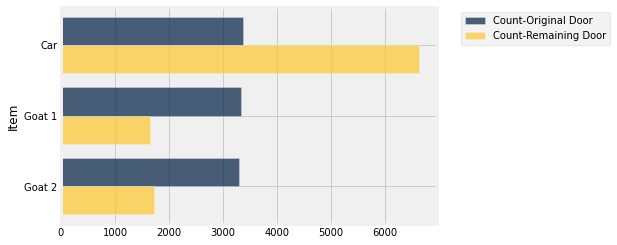

In [ ]:
combined.barh(0)

+ Remaining door를 선택하는 것이 유리함을 알 수 있다.

> ### Probabilities
---

+ 확률의 계산
 - notation
$$ P(event) $$

 - 'chance' == 'probability'
 
 
 
+ 다음 몇 가지 확률계산 기초를 알아두자.


+ Event가 발생하지 않을 확률
$$P(\textrm{an event doesn't happen}) = 1−P(\textrm{the event happens}) $$


+ 모든 outcome이 동일한 확률로 발생한다는 가정
 - 예) 주사위를 굴려 짝수가 나올 확률 = 3/6
 
$$P(\textrm{an event happen}) = \frac{\textrm{#{outcomes that make the event happen}}}{\textrm{#{all outcome}}} $$


+ 곱의 규칙: 두 event가 모두 발생하는 확률
 - 예) Red, Green, Blue 카드 중 2개의 카드를 차례대로 뽑을 때 Red와 Green이 차례대로 뽑힐 확률 = 1/3 * 1/2 = 1/6
$$ P(\textrm{two events both happen}) = P(\textrm{one event happens}) \times P(\textrm{the other event happens, given that the first one happened}) $$


+ 합의 규칙: event가 여러가지 방법으로 발생하는 확률
 - 예) 위 예에서 뽑은 2장의 카드가 Red와 Green일 확률 = P(RG) + P(GR) = 1/6 + 1/6 = 1/3
$$ P(\textrm{an event happens}) = P(\textrm{first way it can happen}) + P(\textrm{second way it can happen}) $$ 


+ 여사건: 적어도 하나가 성공할 확률
 - n번 주사위를 던져 적어도 한 번 6이 나올 확률
$$ P(\textrm{at least one 6 in } n \textrm{ rolls}) = 1 - (\frac{5}{6})^n $$

> ### Recap
---

+ random 구현
 - numpy.random.choice : array내 임의의 element 선택
 - array 비교구문 및 numpy.count_nonzero() 활용
 
 
+ 조건문(conditional statements) 구현
 - _if~else_
 
 
+ 반복문(iterations) 구현
 - _for_
 

+ Simulation
 - simulation 대상 선정 $\rightarrow$ 값(변수) 정의 $\rightarrow$ 반복횟수 결정 $\rightarrow$ _for_ 루프와 array augmentation으로 결과 수집
